# Mixing times 2.0

Here we apply the channel $\mathcal F$ for various values of $\lambda$ and for open boundary conditions. $\lambda$ mixes us between our original $\mathcal E$ channel and its CZ conjugated version. 
The difference between $\mathcal F$ and $\mathcal E$ is that $\mathcal F$ is a random architecture. That is, at each time step, we randomly choose a qubit, and then apply $\mathcal E_j$ on it.
We expect to see that the mixing time scales like the number of qubits squared (i.e. random walk).

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [13, 8]

We ran all the simulations and stored the data with the `data_io.py` file. In this notebook, we load in this data and then plot various things with it.

In [9]:
lams = [0.0, 0.05, 0.1, 0.5, 0.8, 1.0]
num_qubits = list(range(60, 121, 20))
strings, trivial_strings, zzs = {}, {}, {}

for nqubits in num_qubits:
    with open(f"data/nqubits_{nqubits}.dat") as f:
        start = 0
        for l in f:
            if "#" in l:
                start = 1
            elif "&" in l:
                start = 2
            elif "*" in l:
                start = 3
            elif l and start == 1:
                string = np.array(eval(l.strip()))
            elif l and start == 2:
                trivial_string = np.array(eval(l.strip()))
            elif l and start == 3:
                zz = np.array(eval(l.strip()))
    strings[nqubits] = string
    trivial_strings[nqubits] = trivial_string
    zzs[nqubits] = zz

Plot the data for each different $\lambda$.

In [15]:
def plot(quantity, m=10, nqubits=120):
    n = int(0.25 * (nqubits // 2) - 1)
    ms = list(range(n + 1, n + 27))
    ms.append(int(0.75 * (nqubits // 2) - 1))
    j = ms.index(m - n)
    plt.figure()
    if quantity == "string":
        dat = strings[nqubits]
    elif quantity == "trivial string":
        dat = trivial_strings[nqubits]
    elif quantity == "zz":
        dat = zzs[nqubits]

    for i, lam in enumerate(lams[:3]):
        plt.plot(
            range(len(dat[i, j])),
            dat[i, j],
            "-",
            label=f"lam = {lam}",
        )
        # plt.axvline(nqubits**2, linestyle=":", color="k")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xlabel("depth")
        plt.ylabel(quantity)
        plt.title(f"|m-n| = {2*(m-n)}, nqubits = {nqubits}")

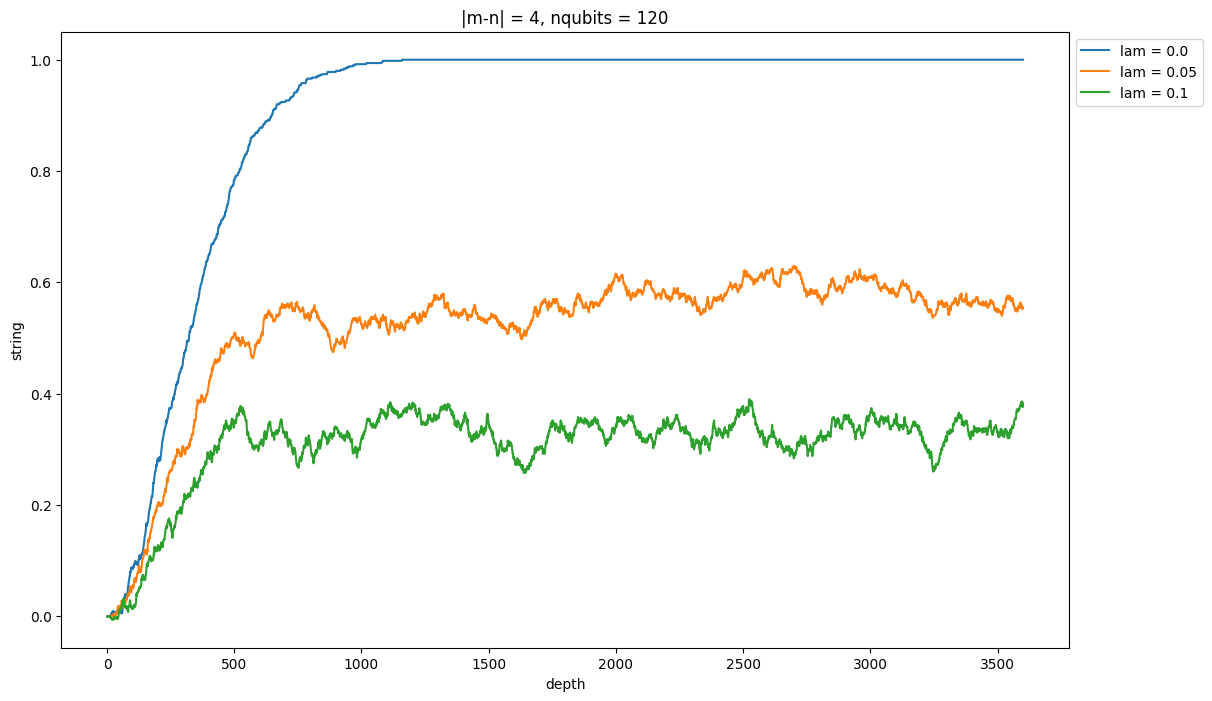

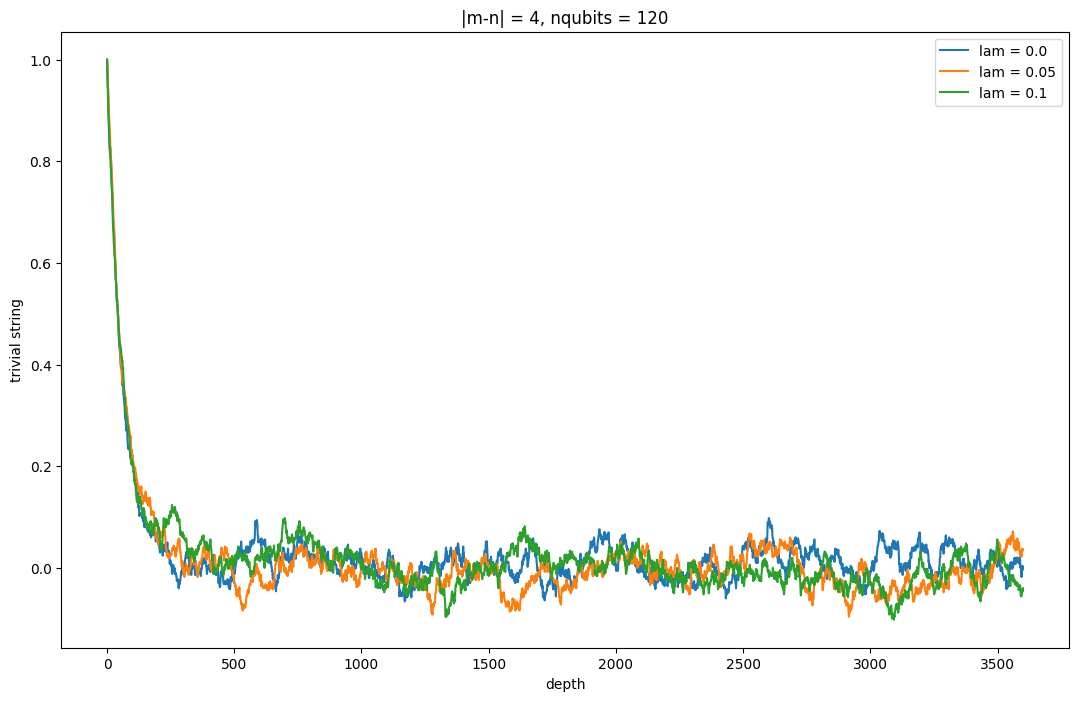

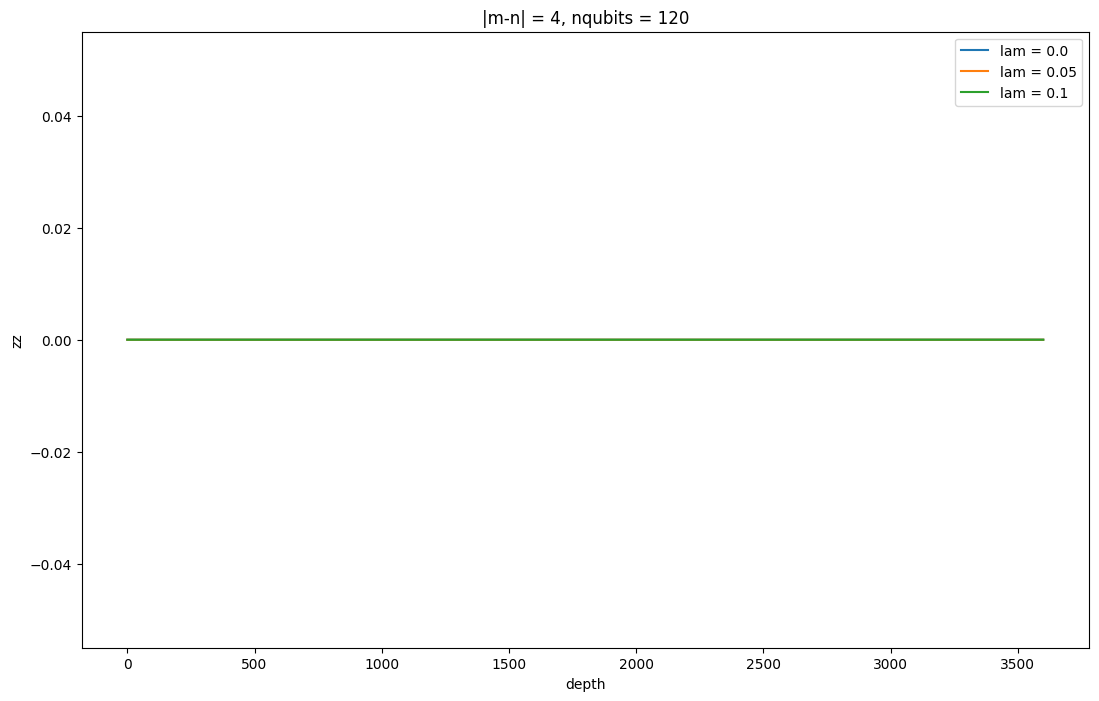

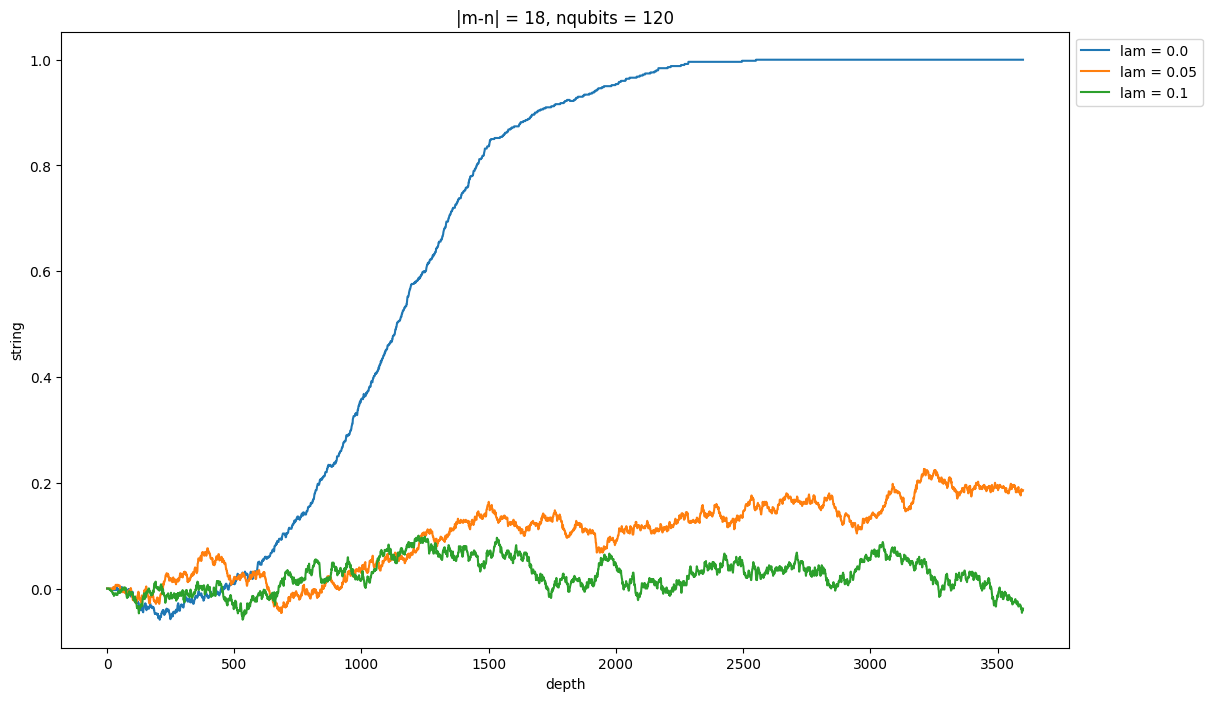

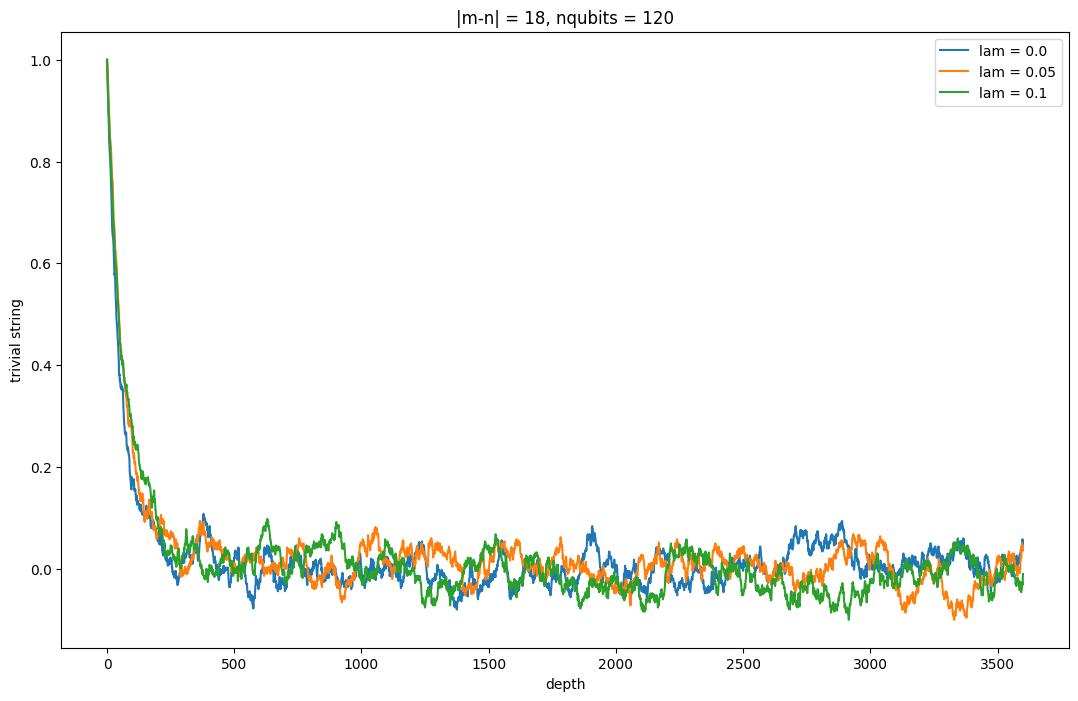

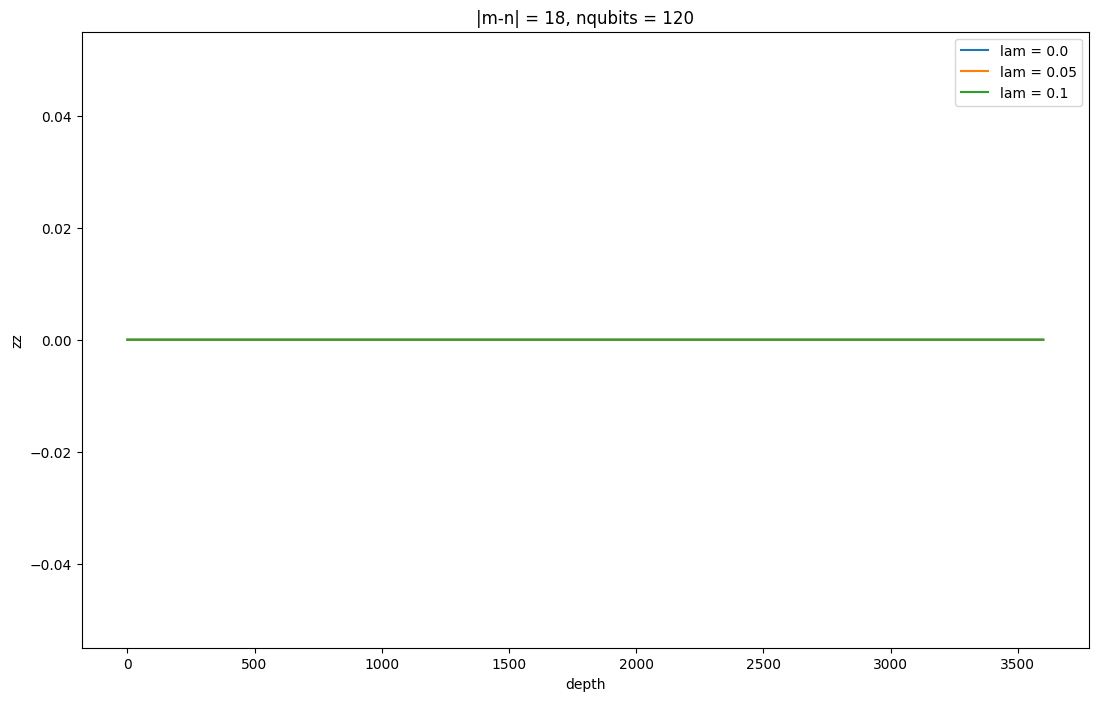

In [16]:
plot("string", 3)
plot("trivial string", 3)
plot("zz", 3)
plot("string", 10)
plot("trivial string", 10)
plot("zz", 10)
plt.show()

## Decay with $\lambda$

Plot the long time average of the string order parameter as a function of $\lambda$.

In [17]:
def plot_lt(quantity, nqubits=120):
    plt.figure()
    if quantity == "string":
        dat = strings[nqubits]
    elif quantity == "trivial string":
        dat = trivial_strings[nqubits]
    elif quantity == "zz":
        dat = zzs[nqubits]

    n = int(0.25 * (nqubits // 2) - 1)
    ms = list(range(n + 1, n + 27))
    ms.append(int(0.75 * (nqubits // 2) - 1))

    for i, lam in enumerate(lams):
        plt.semilogy(
            [2 * (m - n) for m in ms],
            sum(dat[i, :, t] for t in range(-1, -501, -1)) / 500,
            "-",
            label=f"lam = {lam}",
        )
        # plt.axvline(nqubits**2, linestyle=":", color="k")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xlabel("|m-n|")
        plt.ylabel(quantity)
        plt.title(f"{quantity}, nqubits = {nqubits}")

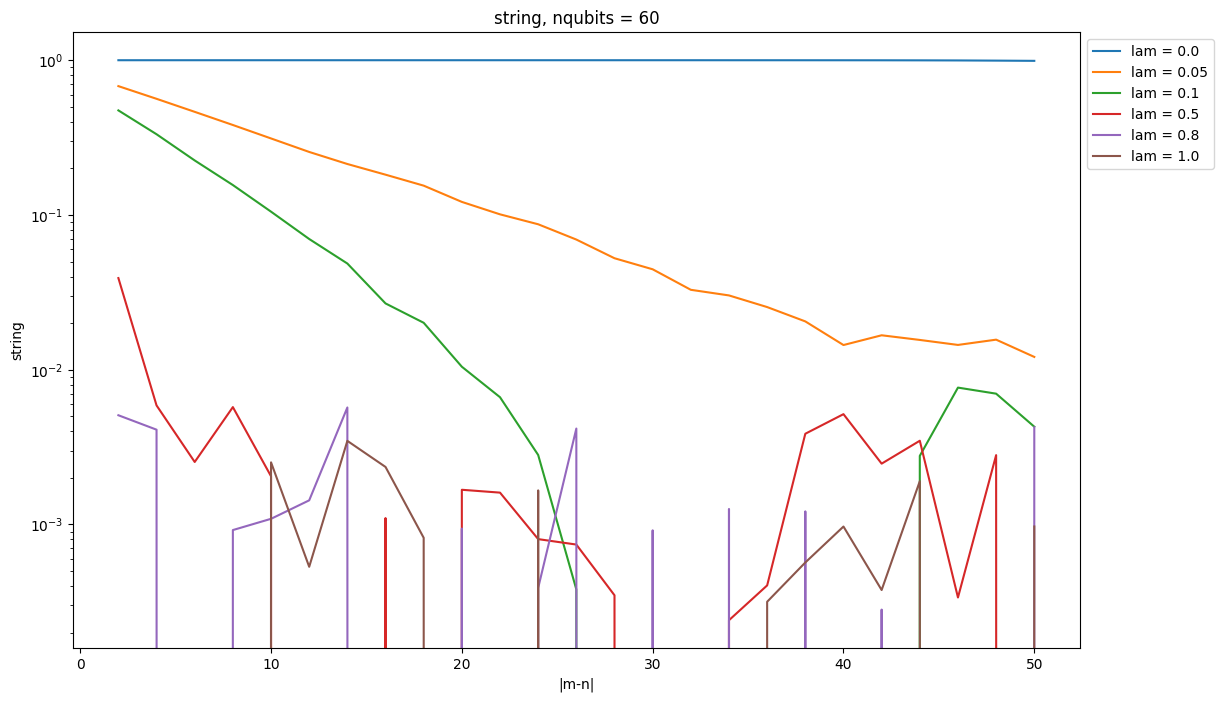

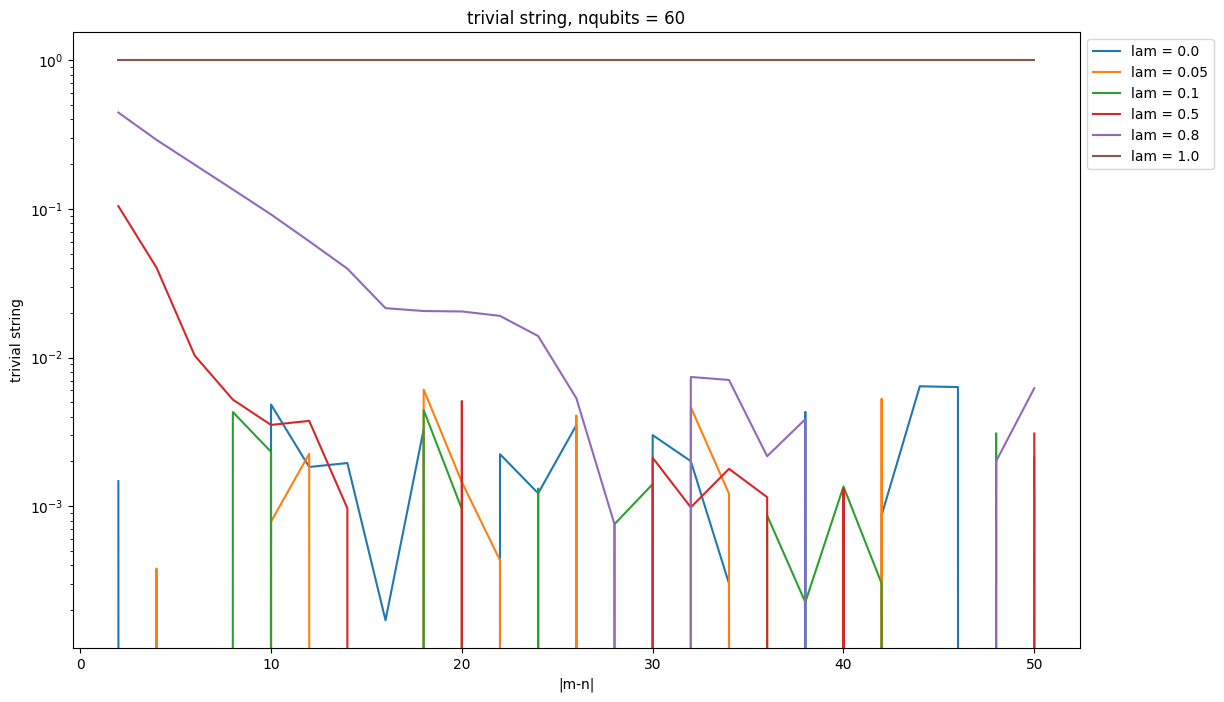

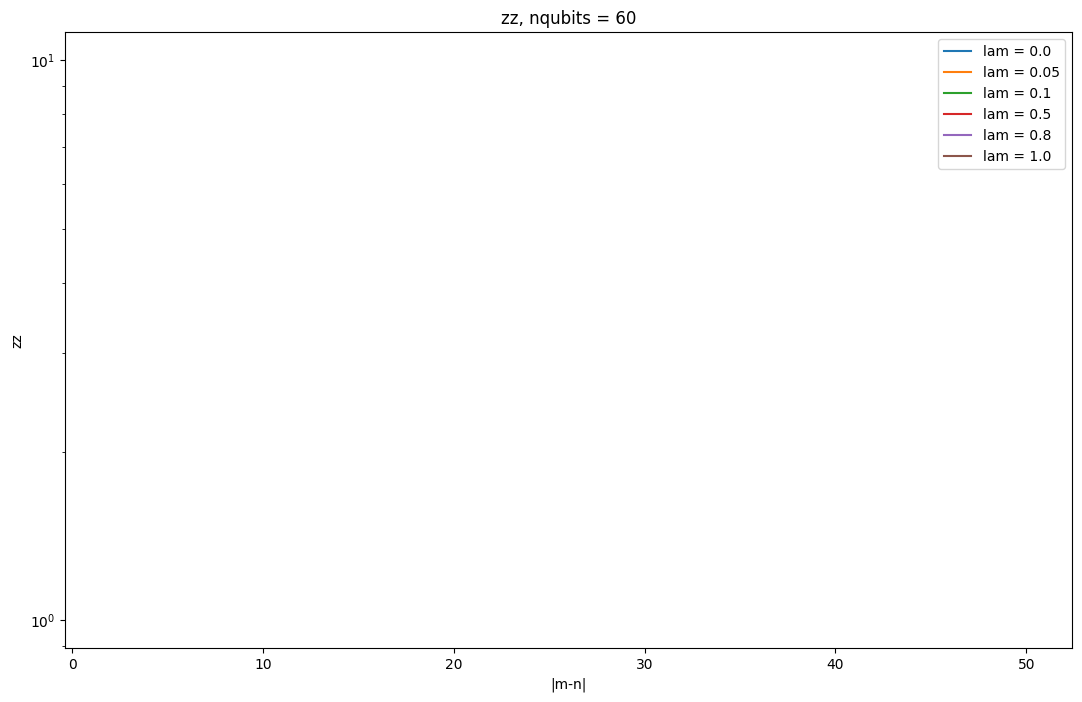

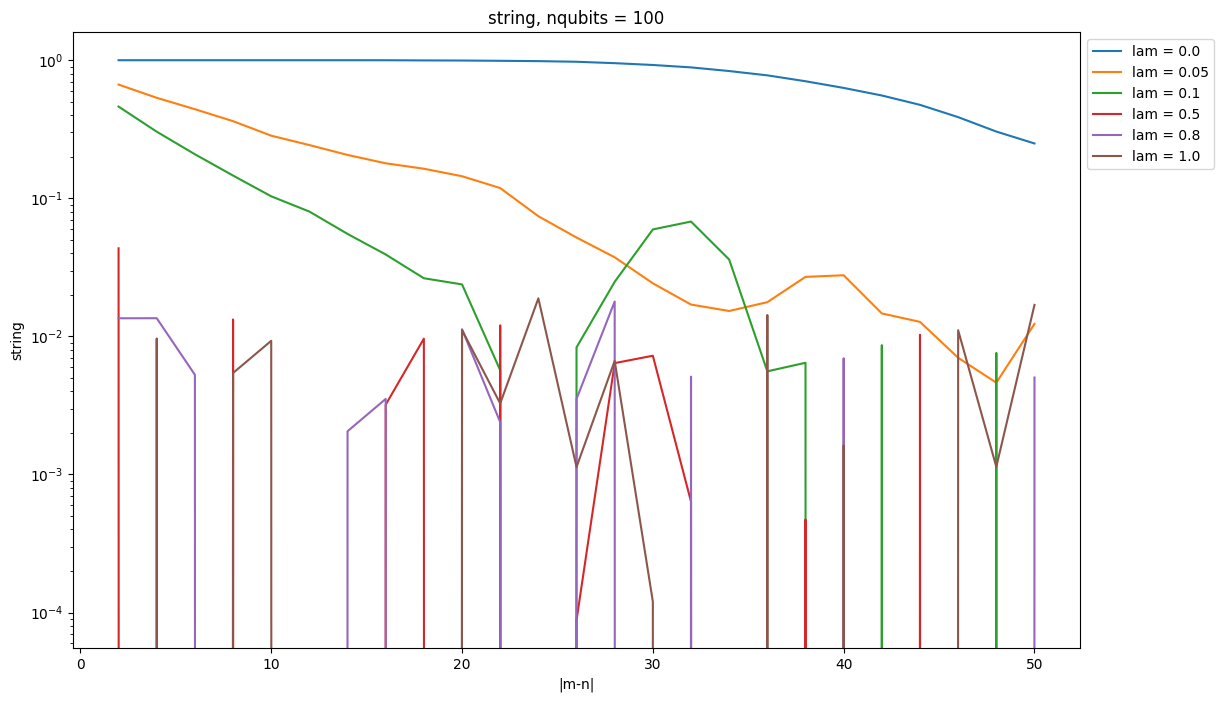

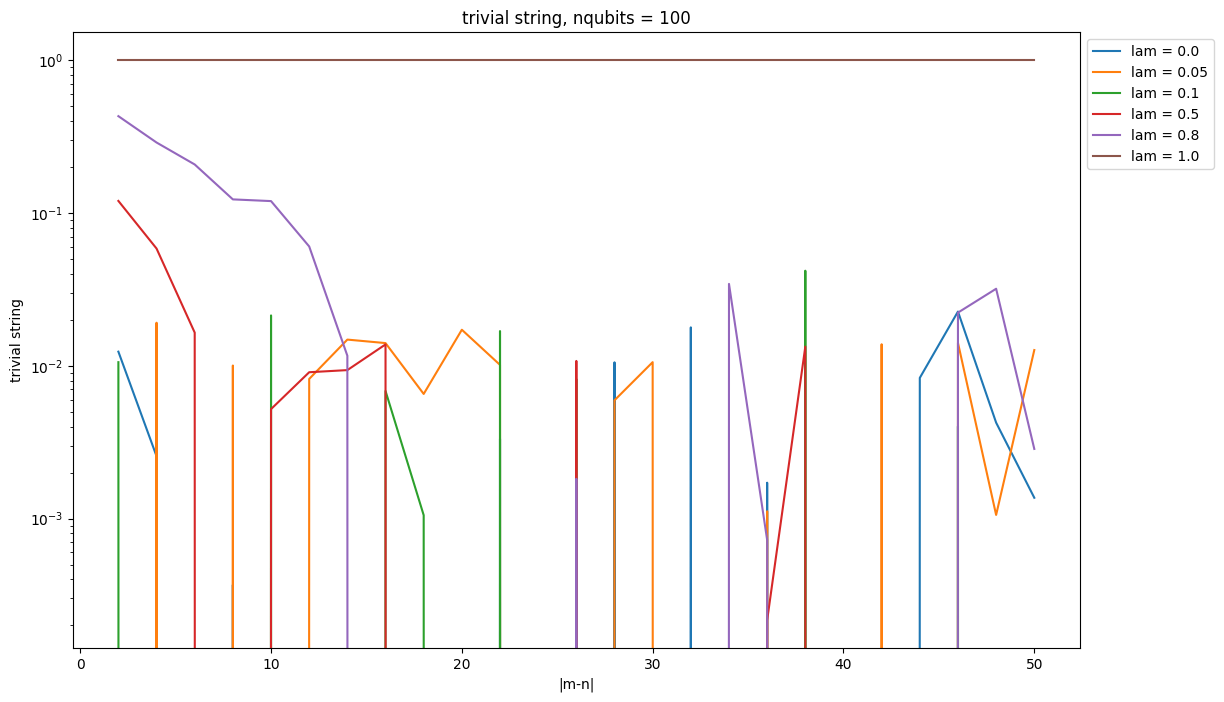

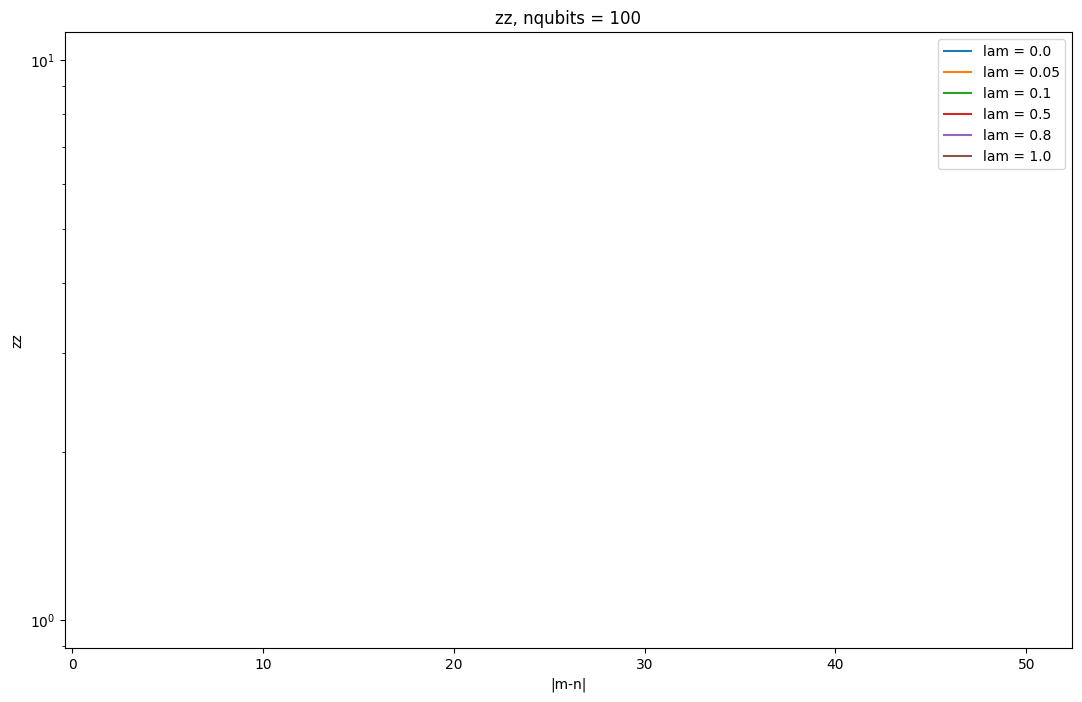

In [19]:
plot_lt("string", 60)
plot_lt("trivial string", 60)
plot_lt("zz", 60)
plot_lt("string", 100)
plot_lt("trivial string", 100)
plot_lt("zz", 100)
plt.show()

## Mixing time

Let's figure out at what depth each curve achieves a value of 0.95. We call that the mixing time. We then plot the mixing time as a function of the number of qubits for each $\lambda$.

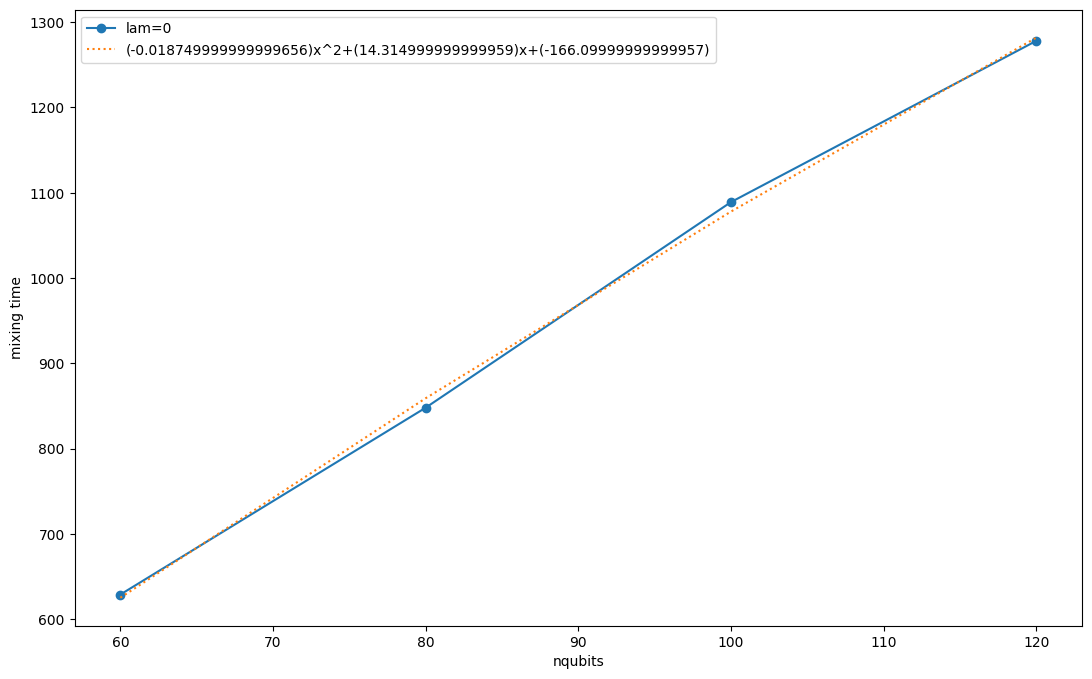

In [23]:
threshold = 0.95
plt.figure()
# lam = 0
xs, mixing_time = [], []
for nqubits in num_qubits:
    # -1 refers to the m
    dat = strings[nqubits][0, -1, :]
    for mt in range(len(dat) - 1, -1, -1):
        if dat[mt] <= threshold:
            break
    if dat[-1] >= threshold:
        xs.append(nqubits)
        mixing_time.append(mt)

if xs:
    plt.plot(xs, mixing_time, "o-", label=f"lam={0}")
    a, b, c = np.polyfit(xs, mixing_time, 2)
    plt.plot(
        xs,
        np.poly1d(np.polyfit(xs, mixing_time, 2))(xs),
        ":",
        label=f"({a})x^2+({b})x+({c})",
    )


plt.xlabel("nqubits")
plt.ylabel("mixing time")
plt.legend()
plt.show()